# Pathwaysim

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

g = nx.read_edgelist('./gene_edges.tsv', nodetype=int,
  data=(('weight',float),), create_using=nx.DiGraph())

print(g.edges(data=True))
pos = nx.spiral_layout(g)
#nx.draw(g, pos)
#plt.show()

[(3640, 51289, {'weight': 1.0}), (3640, 122042, {'weight': 1.0}), (3640, 339403, {'weight': 1.0}), (3640, 59350, {'weight': 1.0}), (51289, 1956, {'weight': 1.0}), (284217, 3680, {'weight': 1.0}), (284217, 3696, {'weight': 1.0}), (284217, 3674, {'weight': 1.0}), (284217, 3675, {'weight': 1.0}), (284217, 3676, {'weight': 1.0}), (284217, 3655, {'weight': 1.0}), (284217, 3678, {'weight': 1.0}), (284217, 3679, {'weight': 1.0}), (284217, 22987, {'weight': 1.0}), (284217, 22801, {'weight': 1.0}), (284217, 3690, {'weight': 1.0}), (284217, 3691, {'weight': 1.0}), (284217, 3693, {'weight': 1.0}), (284217, 9899, {'weight': 1.0}), (284217, 3694, {'weight': 1.0}), (284217, 3672, {'weight': 1.0}), (284217, 3695, {'weight': 1.0}), (284217, 3673, {'weight': 1.0}), (284217, 960, {'weight': 1.0}), (284217, 3685, {'weight': 1.0}), (284217, 8516, {'weight': 1.0}), (284217, 9900, {'weight': 1.0}), (284217, 3688, {'weight': 1.0}), (284217, 8515, {'weight': 1.0}), (284217, 1605, {'weight': 1.0}), (284217, 57

In [3]:
pathways_edges = []
pathways_names = []
pathways_id = []
name2idx = {}
idx2name = {}
i = 1
nodes_list = []
with open("./pathways.tsv") as pathways:
    pathways.readline()
    for pathway in pathways:
        pw = pathway.split("\t")
        pw[2] = pw[2][:-1]
        pw[2] = pw[2].split(";")
        node_list = [(int(node)) for node in pw[2]]
        for node in pw[2]:
            if int(node) not in g:
                g.add_node(int(node))
        while i not in g:
            i += 1
        pathways_id.append(i)
        idx2name[i] = pw[1]
        name2idx[pw[1]] = i
        i += 1
        g.add_node(name2idx[pw[1]])
        pathways_names.append(pw[1])
        for n in node_list:
            pathways_edges.append([pw[1], n])
            g.add_edge(name2idx[pw[1]], n, weight=1.0)

In [4]:
pathways_names

['Oxidative phosphorylation',
 'Synthesis and degradation of ketone bodies',
 'Biosynthesis of unsaturated fatty acids',
 'Intestinal immune network for IgA production',
 'Fanconi anemia pathway',
 'Wnt signaling pathway',
 'Fatty acid degradation',
 'Leukocyte transendothelial migration',
 'Signaling pathways regulating pluripotency of stem cells',
 'Glyoxylate and dicarboxylate metabolism',
 'N-Glycan biosynthesis',
 'Vitamin B6 metabolism',
 'Various types of N-glycan biosynthesis',
 'Mucin type O-glycan biosynthesis',
 'Mannose type O-glycan biosynthesis',
 'Amino sugar and nucleotide sugar metabolism',
 'Phenylalanine, tyrosine and tryptophan biosynthesis',
 'Nicotinate and nicotinamide metabolism',
 'Propanoate metabolism',
 'Neomycin, kanamycin and gentamicin biosynthesis',
 'Natural killer cell mediated cytotoxicity',
 'Fructose and mannose metabolism',
 'Tight junction',
 'Valine, leucine and isoleucine biosynthesis',
 'Galactose metabolism',
 'PPAR signaling pathway',
 'Ascor

In [5]:
pathways_edges

[['Oxidative phosphorylation', 64077],
 ['Oxidative phosphorylation', 5464],
 ['Oxidative phosphorylation', 245972],
 ['Oxidative phosphorylation', 245973],
 ['Oxidative phosphorylation', 479],
 ['Oxidative phosphorylation', 513],
 ['Oxidative phosphorylation', 514],
 ['Oxidative phosphorylation', 515],
 ['Oxidative phosphorylation', 516],
 ['Oxidative phosphorylation', 517],
 ['Oxidative phosphorylation', 518],
 ['Oxidative phosphorylation', 155066],
 ['Oxidative phosphorylation', 51606],
 ['Oxidative phosphorylation', 9114],
 ['Oxidative phosphorylation', 9551],
 ['Oxidative phosphorylation', 9550],
 ['Oxidative phosphorylation', 521],
 ['Oxidative phosphorylation', 522],
 ['Oxidative phosphorylation', 523],
 ['Oxidative phosphorylation', 525],
 ['Oxidative phosphorylation', 526],
 ['Oxidative phosphorylation', 527],
 ['Oxidative phosphorylation', 528],
 ['Oxidative phosphorylation', 529],
 ['Oxidative phosphorylation', 8992],
 ['Oxidative phosphorylation', 90423],
 ['Oxidative phosp

In [6]:
pathways_id

[2,
 25,
 27,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 48,
 50,
 51,
 52,
 54,
 59,
 60,
 71,
 90,
 91,
 92,
 93,
 107,
 108,
 109,
 111,
 112,
 113,
 114,
 115,
 116,
 117,
 123,
 124,
 125,
 126,
 127,
 128,
 130,
 131,
 133,
 134,
 135,
 136,
 140,
 142,
 143,
 146,
 147,
 148,
 150,
 151,
 152,
 153,
 154,
 155,
 156,
 157,
 174,
 178,
 181,
 182,
 183,
 185,
 186,
 187,
 189,
 190,
 191,
 196,
 203,
 204,
 205,
 207,
 208,
 210,
 211,
 212,
 214,
 216,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 224,
 226,
 229,
 230,
 231,
 239,
 240,
 242,
 246,
 247,
 248,
 249,
 250,
 251,
 262,
 268,
 269,
 270,
 271,
 272,
 273,
 274,
 275,
 276,
 277,
 278,
 279,
 280,
 284,
 285,
 290,
 291,
 292,
 293,
 314,
 316,
 317,
 318,
 324,
 329,
 330,
 331,
 332,
 335,
 336,
 338,
 341,
 344,
 345,
 348,
 350,
 353,
 355,
 356,
 358,
 359,
 362,
 364,
 369,
 374,
 375,
 382,
 383,
 384,
 387,
 394,
 396,
 397,
 398,
 405,
 406,
 408,
 409,
 410,
 411,
 412,
 427,
 434,
 435,
 438,
 440,


In [7]:
name2idx

{'Oxidative phosphorylation': 2,
 'Synthesis and degradation of ketone bodies': 25,
 'Biosynthesis of unsaturated fatty acids': 27,
 'Intestinal immune network for IgA production': 30,
 'Fanconi anemia pathway': 31,
 'Wnt signaling pathway': 32,
 'Fatty acid degradation': 33,
 'Leukocyte transendothelial migration': 34,
 'Signaling pathways regulating pluripotency of stem cells': 35,
 'Glyoxylate and dicarboxylate metabolism': 36,
 'N-Glycan biosynthesis': 37,
 'Vitamin B6 metabolism': 38,
 'Various types of N-glycan biosynthesis': 39,
 'Mucin type O-glycan biosynthesis': 48,
 'Mannose type O-glycan biosynthesis': 50,
 'Amino sugar and nucleotide sugar metabolism': 51,
 'Phenylalanine, tyrosine and tryptophan biosynthesis': 52,
 'Nicotinate and nicotinamide metabolism': 54,
 'Propanoate metabolism': 59,
 'Neomycin, kanamycin and gentamicin biosynthesis': 60,
 'Natural killer cell mediated cytotoxicity': 71,
 'Fructose and mannose metabolism': 90,
 'Tight junction': 91,
 'Valine, leucin

In [8]:
idx2name

{2: 'Oxidative phosphorylation',
 25: 'Synthesis and degradation of ketone bodies',
 27: 'Biosynthesis of unsaturated fatty acids',
 30: 'Intestinal immune network for IgA production',
 31: 'Fanconi anemia pathway',
 32: 'Wnt signaling pathway',
 33: 'Fatty acid degradation',
 34: 'Leukocyte transendothelial migration',
 35: 'Signaling pathways regulating pluripotency of stem cells',
 36: 'Glyoxylate and dicarboxylate metabolism',
 37: 'N-Glycan biosynthesis',
 38: 'Vitamin B6 metabolism',
 39: 'Various types of N-glycan biosynthesis',
 48: 'Mucin type O-glycan biosynthesis',
 50: 'Mannose type O-glycan biosynthesis',
 51: 'Amino sugar and nucleotide sugar metabolism',
 52: 'Phenylalanine, tyrosine and tryptophan biosynthesis',
 54: 'Nicotinate and nicotinamide metabolism',
 59: 'Propanoate metabolism',
 60: 'Neomycin, kanamycin and gentamicin biosynthesis',
 71: 'Natural killer cell mediated cytotoxicity',
 90: 'Fructose and mannose metabolism',
 91: 'Tight junction',
 92: 'Valine, le

In [9]:
print(g.edges(data=True))

[(3640, 51289, {'weight': 1.0}), (3640, 122042, {'weight': 1.0}), (3640, 339403, {'weight': 1.0}), (3640, 59350, {'weight': 1.0}), (51289, 1956, {'weight': 1.0}), (284217, 3680, {'weight': 1.0}), (284217, 3696, {'weight': 1.0}), (284217, 3674, {'weight': 1.0}), (284217, 3675, {'weight': 1.0}), (284217, 3676, {'weight': 1.0}), (284217, 3655, {'weight': 1.0}), (284217, 3678, {'weight': 1.0}), (284217, 3679, {'weight': 1.0}), (284217, 22987, {'weight': 1.0}), (284217, 22801, {'weight': 1.0}), (284217, 3690, {'weight': 1.0}), (284217, 3691, {'weight': 1.0}), (284217, 3693, {'weight': 1.0}), (284217, 9899, {'weight': 1.0}), (284217, 3694, {'weight': 1.0}), (284217, 3672, {'weight': 1.0}), (284217, 3695, {'weight': 1.0}), (284217, 3673, {'weight': 1.0}), (284217, 960, {'weight': 1.0}), (284217, 3685, {'weight': 1.0}), (284217, 8516, {'weight': 1.0}), (284217, 9900, {'weight': 1.0}), (284217, 3688, {'weight': 1.0}), (284217, 8515, {'weight': 1.0}), (284217, 1605, {'weight': 1.0}), (284217, 57

In [10]:
lines = []
for edge in g.edges(data=True):
    lines.append(str(edge[0]) + "\t" + str(edge[1]) + "\n")
lines
with open("graph.txt", "w") as f:
    f.writelines(lines)

In [74]:
G = nx.Graph()
pathways_edges = []
pathways_names = []
with open("./pathways.tsv") as pathways:
    pathways.readline()
    for pathway in pathways:
        pw = pathway.split("\t")
        pw[2] = pw[2][:-1]
        pw[2] = pw[2].split(";")
        node_list = [(int(node)) for node in pw[2]]
        G.add_node(pw[1])
        pathways_names.append(pw[1])
        for n in node_list:
            if n not in G:
                G.add_node(n)
            pathways_edges.append([pw[1], n])
            G.add_edge(pw[1], n, weight=1.0)

In [75]:
p = []
for pn in pathways_names:
    d = {}
    for node in G.nodes():
        if node == pn:
            d[node] = 1
        else:
            d[node] = 0
    p.append(d)
print(p[0])

{'Oxidative phosphorylation': 1, 64077: 0, 5464: 0, 245972: 0, 245973: 0, 479: 0, 513: 0, 514: 0, 515: 0, 516: 0, 517: 0, 518: 0, 155066: 0, 51606: 0, 9114: 0, 9551: 0, 9550: 0, 521: 0, 522: 0, 523: 0, 525: 0, 526: 0, 527: 0, 528: 0, 529: 0, 8992: 0, 90423: 0, 127124: 0, 23545: 0, 51382: 0, 495: 0, 4508: 0, 496: 0, 4509: 0, 498: 0, 533: 0, 534: 0, 535: 0, 27068: 0, 537: 0, 539: 0, 10312: 0, 10476: 0, 10632: 0, 50617: 0, 9296: 0, 506: 0, 509: 0, 'Synthesis and degradation of ketone bodies': 0, 64064: 0, 38: 0, 39: 0, 3155: 0, 56898: 0, 54511: 0, 622: 0, 3158: 0, 3157: 0, 5019: 0, 'Biosynthesis of unsaturated fatty acids': 0, 641371: 0, 79966: 0, 6319: 0, 570: 0, 9415: 0, 3992: 0, 10965: 0, 122970: 0, 11332: 0, 'Intestinal immune network for IgA production': 0, 4055: 0, 8174: 0, 959: 0, 8741: 0, 3600: 0, 23308: 0, 102723407: 0, 6370: 0, 56477: 0, 10673: 0, 6387: 0, 102723996: 0, 941: 0, 942: 0, 9020: 0, 3695: 0, 3676: 0, 7852: 0, 958: 0, 23495: 0, 608: 0, 3601: 0, 29851: 0, 5284: 0, 1080

In [76]:
print(G.edges(data=True))

[('Oxidative phosphorylation', 64077, {'weight': 1.0}), ('Oxidative phosphorylation', 5464, {'weight': 1.0}), ('Oxidative phosphorylation', 245972, {'weight': 1.0}), ('Oxidative phosphorylation', 245973, {'weight': 1.0}), ('Oxidative phosphorylation', 479, {'weight': 1.0}), ('Oxidative phosphorylation', 513, {'weight': 1.0}), ('Oxidative phosphorylation', 514, {'weight': 1.0}), ('Oxidative phosphorylation', 515, {'weight': 1.0}), ('Oxidative phosphorylation', 516, {'weight': 1.0}), ('Oxidative phosphorylation', 517, {'weight': 1.0}), ('Oxidative phosphorylation', 518, {'weight': 1.0}), ('Oxidative phosphorylation', 155066, {'weight': 1.0}), ('Oxidative phosphorylation', 51606, {'weight': 1.0}), ('Oxidative phosphorylation', 9114, {'weight': 1.0}), ('Oxidative phosphorylation', 9551, {'weight': 1.0}), ('Oxidative phosphorylation', 9550, {'weight': 1.0}), ('Oxidative phosphorylation', 521, {'weight': 1.0}), ('Oxidative phosphorylation', 522, {'weight': 1.0}), ('Oxidative phosphorylation'

In [82]:
nx.pagerank(G, alpha=0.1, personalization=p[0], max_iter=1000)

{'Oxidative phosphorylation': 0.907755333844022,
 64077: 0.001931408147876725,
 5464: 0.001931408147876725,
 245972: 0.001931408147876725,
 245973: 0.001932216743010593,
 479: 0.001931408147876725,
 513: 0.001931408147876725,
 514: 0.001931408147876725,
 515: 0.001931408147876725,
 516: 0.001931408147876725,
 517: 0.001931408147876725,
 518: 0.001931408147876725,
 155066: 0.001931408147876725,
 51606: 0.001932216743010593,
 9114: 0.001931408147876725,
 9551: 0.001931408147876725,
 9550: 0.001932216743010593,
 521: 0.001931408147876725,
 522: 0.001931408147876725,
 523: 0.001932216743010593,
 525: 0.001932216743010593,
 526: 0.001932216743010593,
 527: 0.001931408147876725,
 528: 0.001932216743010593,
 529: 0.001932216743010593,
 8992: 0.001931408147876725,
 90423: 0.001932216743010593,
 127124: 0.001932216743010593,
 23545: 0.001931408147876725,
 51382: 0.001932216743010593,
 495: 0.001931408147876725,
 4508: 0.001931408147876725,
 496: 0.001931408147876725,
 4509: 0.001931408147876725

In [84]:
pn1 = 'Oxidative phosphorylation'
pn2 = 'Synthesis and degradation of ketone bodies'
nx.simrank_similarity(G, source=pn1, target=pn1, importance_factor=0.5, max_iterations=100, tolerance=0.0001)

KeyboardInterrupt: 

In [60]:
for pers in p:
    nx.pagerank(G, personalization=pers)

AttributeError: 'set' object has no attribute 'values'

In [59]:
nx.simrank_similarity(G)

KeyboardInterrupt: 

In [52]:
print(nx.is_bipartite(G))
nx.is_connected(G)

True


False

In [53]:
for pn1 in pathways_names:
    for pn2 in pathways_names:
        print(nx.simrank_similarity(G, pn1, pn2))

KeyboardInterrupt: 

In [10]:
pn1 = 'Oxidative phosphorylation'
pn2 = 'Synthesis and degradation of ketone bodies'
nx.simrank_similarity(G, source=pn1, target=pn2, importance_factor=0.9, max_iterations=100, tolerance=0.0001)

0.0

In [ ]:
@params(G=nx.DiGraph, r=float, max_iter=long, eps=float)
def simrank_bipartite(G, r=0.8, max_iter=100, eps=1e-4):
    """ A bipartite version in the paper.
    """
    if not nx.is_bipartite(G):
        assert("A bipartie graph is required.")
 
    nodes = G.nodes()
    nodes_i = {}
    for (k, v) in [(nodes[i], i) for i in range(0, len(nodes))]:
        nodes_i[k] = v
 
    sim_prev = np.zeros(len(nodes))
    sim = np.identity(len(nodes))
 
    lns = {}
    rns = {}
    for n in nodes:
        preds = G.predecessors(n)
        succs = G.successors(n)
        if len(preds) == 0:
            lns[n] = succs
        else:
            rns[n] = preds
 
    def _update_partite(ns):
        for u, v in itertools.product(ns.keys(), ns.keys()):
            if u is v: continue
            u_ns, v_ns = ns[u], ns[v]
            if len(u_ns) == 0 or len(v_ns) == 0:
                sim[nodes_i[u]][nodes_i[v]] = 0
            else:
                s_uv = sum([sim_prev[nodes_i[u_n]][nodes_i[v_n]] for u_n, v_n in itertools.product(u_ns, v_ns)])
                sim[nodes_i[u]][nodes_i[v]] = (r * s_uv) / (len(u_ns) * len(v_ns))
 
    for i in range(max_iter):
        if np.allclose(sim, sim_prev, atol=eps):
            break
        sim_prev = np.copy(sim)
        _update_partite(lns)
        _update_partite(rns)
 
    print("Converge after %d iterations (eps=%f)." % (i, eps))
 
    return sim

True


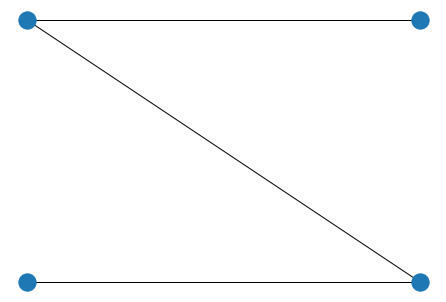

In [40]:
Gi = nx.path_graph(4)
print(nx.is_connected(Gi))
top = nx.bipartite.sets(Gi)[0]
pos = nx.bipartite_layout(Gi, top)
nx.draw(Gi, pos)
plt.show()